In [1]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn import preprocessing, model_selection, metrics

In [205]:
df_raw = pd.read_feather('feather/flight_train_raw_exp')
test = pd.read_feather('feather/flight_test_raw_exp')

In [206]:
train_cats(df_raw)
apply_cats(df=test, trn=df_raw)

In [207]:
df_raw.Price = np.log(df_raw.Price)

In [208]:
bad_cols = ['Date_of_JourneyWeek',
 'Date_of_JourneyMonth',
 'Date_of_JourneyYear',
 'Date_of_JourneyIs_month_end',
 'Date_of_JourneyIs_month_start',
 'Date_of_JourneyIs_quarter_end',
 'Date_of_JourneyIs_quarter_start',
 'Date_of_JourneyIs_year_end',
 'Date_of_JourneyIs_year_start',
 'Date_of_JourneyElapsed']

In [209]:
df_raw.drop(bad_cols,axis=1,inplace=True);


test.drop(bad_cols,axis=1,inplace=True);

In [210]:
df_raw.shape,test.shape

((10683, 13), (2671, 12))

In [213]:
df_raw.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Dur_In_Minutes,session_dep,session_arr,Date_of_JourneyDay,Date_of_JourneyDayofweek,Date_of_JourneyDayofyear,Price,Non-Stop
0,IndiGo,Banglore,New Delhi,5,No info,170.0,Evening,Night,24,6,83,8.267962,1
1,Air India,Kolkata,Banglore,3,No info,445.0,Night,Afternoon,5,5,5,8.944028,0


In [214]:
test.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Dur_In_Minutes,session_dep,session_arr,Date_of_JourneyDay,Date_of_JourneyDayofweek,Date_of_JourneyDayofyear,Non-Stop
0,Jet Airways,Delhi,Cochin,4,No info,655.0,Afternoon,Night,6,3,157,0
1,IndiGo,Kolkata,Banglore,4,No info,240.0,Night,Morning,5,3,339,0


In [ ]:
#Filtering out the categorical columns

In [240]:
my_d = dict(df_raw.dtypes)

numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

categorical_columns = [c for c,v in my_d.items() if v not in numerics]
categorical_columns

['Airline',
 'Source',
 'Destination',
 'Additional_Info',
 'session_dep',
 'session_arr']

In [59]:
# Doing Binary Encoding using proc_df

In [216]:
train, y , nas = proc_df(df_raw, 'Price')
test, _, nas = proc_df(test, na_dict=nas)
train, y , nas = proc_df(df_raw, 'Price', na_dict=nas)

In [217]:
train.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Dur_In_Minutes,session_dep,session_arr,Date_of_JourneyDay,Date_of_JourneyDayofweek,Date_of_JourneyDayofyear,Non-Stop
0,4,1,6,5,9,170.0,4,1,24,6,83,1
1,2,4,1,3,9,445.0,1,3,5,5,5,0


In [218]:
test.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Dur_In_Minutes,session_dep,session_arr,Date_of_JourneyDay,Date_of_JourneyDayofweek,Date_of_JourneyDayofyear,Non-Stop
0,5,3,2,4,9,655.0,3,1,6,3,157,0
1,4,4,1,4,9,240.0,1,2,5,3,339,0


# Training the LGBM Model!

In [219]:
model = lgb.LGBMModel()
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [259]:
params = {'num_leaves': 32,
         'min_data_in_leaf': 70, 
         'objective':'regression',
         'max_depth': 20,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "metric": 'rmse',
         "verbosity": -1} #73

In [221]:
target = df_raw['Price']

In [222]:
train.shape,target.shape,test.shape

((10683, 12), (10683,), (2671, 12))

In [223]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
#Conert the date realted data into categorical varibales!

In [224]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Dur_In_Minutes', 'session_dep', 'session_arr', 'Date_of_JourneyDay',
       'Date_of_JourneyDayofweek', 'Date_of_JourneyDayofyear', 'Non-Stop'],
      dtype='object')

In [256]:
date_columns = ['Date_of_JourneyDay','Date_of_JourneyDayofweek', 'Date_of_JourneyDayofyear']

In [257]:
categorical_columns = categorical_columns + date_columns

In [258]:
categorical_columns

['Airline',
 'Source',
 'Destination',
 'Additional_Info',
 'session_dep',
 'session_arr',
 'Date_of_JourneyDay',
 'Date_of_JourneyDayofweek',
 'Date_of_JourneyDayofyear']

In [260]:
#Now fine tune the model from here onwards!
folds = KFold(n_splits=5, shuffle=True, random_state=42)
categorical_columns = categorical_columns #to hold cat. columns
features = [c for c in train.columns] #features
predictions = np.zeros(len(test)) #to hold predictions
feature_importance_df = pd.DataFrame() #to hold feature importance
score = [0 for _ in range(folds.n_splits)] #5 scores for 5 diff rmse!
rmse_l = []
rmse_mean = []
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("fold n°{}".format(fold_))
    X_train = train.iloc[trn_idx][features]
    X_valid = train.iloc[val_idx][features]
    y_train = target.iloc[trn_idx]
    y_valid = target.iloc[val_idx]
    
    #remove this for final
    
    
    
    trn_data = lgb.Dataset(X_train,
                           label=y_train,
                           categorical_feature = categorical_columns,

                          )
    val_data = lgb.Dataset(X_valid,
                           label=y_valid,
                           reference=trn_data,
                           categorical_feature = categorical_columns,

                          )

    num_round = 30000
    model = lgb.train(params,
                    trn_data,
                    num_round,
                    valid_sets = [trn_data, val_data],
                    verbose_eval=1000,
                    early_stopping_rounds = 200,
                   )
    predctions_test = model.predict(test, num_iteration=model.best_iteration)
    predictions += predctions_test/5
    
    pred_test_y = model.predict(X_valid, num_iteration=model.best_iteration)
    rmse = sqrt(mean_squared_error(y_valid, pred_test_y))
    rmse_l.append(rmse)
    
rmse_array = np.asarray(rmse_l)
    
rmse_mean.append(rmse_array.mean())
print('Mean RMSE:')
print(rmse_mean)

fold n°0
Training until validation scores don't improve for 200 rounds.


/home/arsim/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/arsim/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1000]	training's rmse: 0.135432	valid_1's rmse: 0.157142
[2000]	training's rmse: 0.119789	valid_1's rmse: 0.149616
[3000]	training's rmse: 0.110111	valid_1's rmse: 0.146009
[4000]	training's rmse: 0.102567	valid_1's rmse: 0.143363
[5000]	training's rmse: 0.0969343	valid_1's rmse: 0.141754
[6000]	training's rmse: 0.0925794	valid_1's rmse: 0.14054
[7000]	training's rmse: 0.089141	valid_1's rmse: 0.139978
[8000]	training's rmse: 0.086039	valid_1's rmse: 0.139543
[9000]	training's rmse: 0.0834045	valid_1's rmse: 0.139126
[10000]	training's rmse: 0.0808433	valid_1's rmse: 0.138671
[11000]	training's rmse: 0.0785207	valid_1's rmse: 0.138223
[12000]	training's rmse: 0.0765455	valid_1's rmse: 0.137932
Early stopping, best iteration is:
[11874]	training's rmse: 0.0767962	valid_1's rmse: 0.137911
fold n°1
Training until validation scores don't improve for 200 rounds.


/home/arsim/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/arsim/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1000]	training's rmse: 0.137245	valid_1's rmse: 0.148692
[2000]	training's rmse: 0.119798	valid_1's rmse: 0.141917
[3000]	training's rmse: 0.109735	valid_1's rmse: 0.138942
[4000]	training's rmse: 0.102654	valid_1's rmse: 0.137201
[5000]	training's rmse: 0.0972744	valid_1's rmse: 0.136268
[6000]	training's rmse: 0.0930924	valid_1's rmse: 0.135665
[7000]	training's rmse: 0.0894772	valid_1's rmse: 0.135155
Early stopping, best iteration is:
[7050]	training's rmse: 0.0893311	valid_1's rmse: 0.135147
fold n°2
Training until validation scores don't improve for 200 rounds.


/home/arsim/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/arsim/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1000]	training's rmse: 0.137157	valid_1's rmse: 0.151083
[2000]	training's rmse: 0.121001	valid_1's rmse: 0.143604
[3000]	training's rmse: 0.11097	valid_1's rmse: 0.139827
[4000]	training's rmse: 0.103897	valid_1's rmse: 0.137818
[5000]	training's rmse: 0.098308	valid_1's rmse: 0.136593
[6000]	training's rmse: 0.0935902	valid_1's rmse: 0.135778
[7000]	training's rmse: 0.0895466	valid_1's rmse: 0.135054
[8000]	training's rmse: 0.0861664	valid_1's rmse: 0.13466
[9000]	training's rmse: 0.0833899	valid_1's rmse: 0.134321
Early stopping, best iteration is:
[9674]	training's rmse: 0.0816066	valid_1's rmse: 0.134144
fold n°3
Training until validation scores don't improve for 200 rounds.


/home/arsim/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/arsim/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1000]	training's rmse: 0.133732	valid_1's rmse: 0.162724
[2000]	training's rmse: 0.117353	valid_1's rmse: 0.156065
[3000]	training's rmse: 0.107313	valid_1's rmse: 0.152912
[4000]	training's rmse: 0.0999586	valid_1's rmse: 0.151053
[5000]	training's rmse: 0.0945652	valid_1's rmse: 0.149906
[6000]	training's rmse: 0.0902166	valid_1's rmse: 0.149462
Early stopping, best iteration is:
[6123]	training's rmse: 0.0897952	valid_1's rmse: 0.149418
fold n°4
Training until validation scores don't improve for 200 rounds.


/home/arsim/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/arsim/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1000]	training's rmse: 0.134686	valid_1's rmse: 0.158971
[2000]	training's rmse: 0.11772	valid_1's rmse: 0.153776
[3000]	training's rmse: 0.108235	valid_1's rmse: 0.151629
[4000]	training's rmse: 0.10186	valid_1's rmse: 0.150501
[5000]	training's rmse: 0.0965998	valid_1's rmse: 0.149725
Early stopping, best iteration is:
[5579]	training's rmse: 0.0941316	valid_1's rmse: 0.149472
Mean RMSE:
[0.14121854195081285]


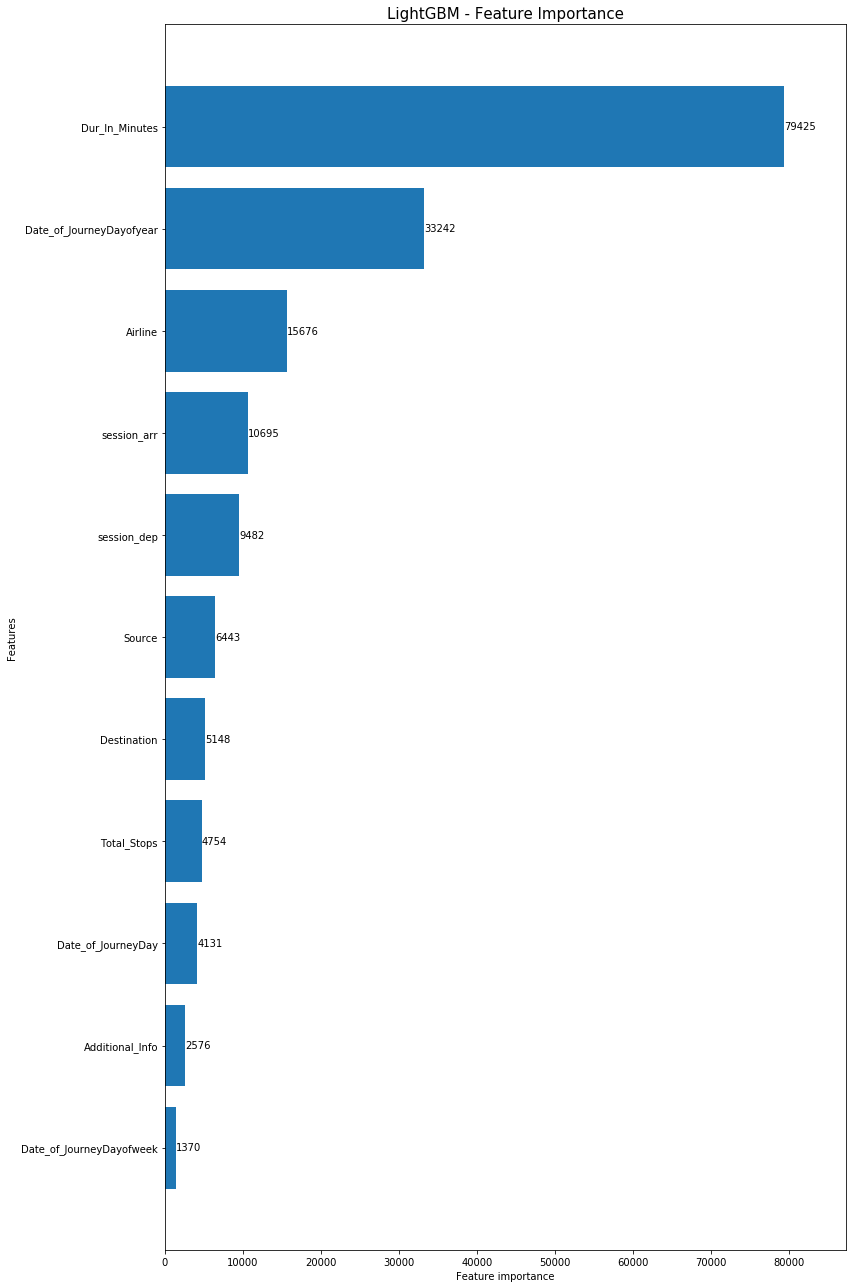

In [261]:

fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.tight_layout()
plt.savefig('lgbm_1st4mil_importances.png')
plt.show()

In [262]:
predictions

array([9.57387, 8.40801, 9.47688, ..., 9.76137, 9.38711, 9.07594])

In [263]:
preds = np.exp(predictions)
preds

array([14383.97406,  4482.82094, 13054.36125, ..., 17350.44602, 11933.51964,  8742.41467])

In [264]:
pred_df_rf = pd.DataFrame(preds, columns = ['Price'])
pred_df_rf

,Price
0,14383.974065
1,4482.820941
2,13054.361250
3,10062.560092
4,3910.042677
5,10336.513878
6,10150.164666
7,5531.225150
8,4221.431919
9,14660.871733


In [265]:
pred_df_rf.to_excel("flight_lgbm_3_date_as_cat.xlsx", index = False)